In [1]:
# Initialization the nuscenes devkit
%matplotlib inline
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-mini', dataroot='/home/hwc/data/sets/nuscenes', verbose=True)
%run export_2D_bbox.ipynb

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.222 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
human.pedestrian.adult
human.pedestrian.child
human.pedestrian.wheelchair
human.pedestrian.stroller
human.pedestrian.personal_mobility
human.pedestrian.police_officer
human.pedestrian.construction_worker
animal
vehicle.car
vehicle.motorcycle
vehicle.bicycle
vehicle.bus.bendy
vehicle.bus.rigid
vehicle.truck
vehicle.construction
vehicle.emergency.ambulance
vehicle.emergency.police
vehicle.trailer
movable_object.barrier
movable_object.trafficcone
movable_object.pushable_pullable
movable_object.debris
static_object.bicycle_rack
Total number of samples
404


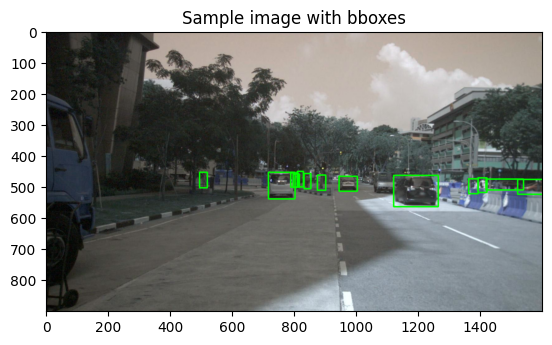

In [2]:
# Plot a sample image with bboxes

import os
import cv2
from matplotlib import pyplot as plt

no_anno = 3

root = '/home/hwc/data/sets/nuscenes'
root_img = '/home/hwc/data/sets/nuscenes/samples/CAM_FRONT'
file_list = os.listdir(root_img)

rt_img = extract_bounding_box(no_anno,'CAM_FRONT')[6]
index_img = rt_img.find('/',46)
name_img = rt_img[index_img+1:]
no_img = file_list.index(name_img)

img = cv2.imread(root_img+'/'+file_list[no_img])

for i in range(len(extract_bounding_box(no_anno,'CAM_FRONT')[0])):
    x_min = extract_bounding_box(no_anno,'CAM_FRONT')[0][i].astype(np.int64)
    x_max = extract_bounding_box(no_anno,'CAM_FRONT')[1][i].astype(np.int64)
    y_min = extract_bounding_box(no_anno,'CAM_FRONT')[2][i].astype(np.int64)
    y_max = extract_bounding_box(no_anno,'CAM_FRONT')[3][i].astype(np.int64)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0,255,0), 3)

plt.imshow(img)
plt.title('Sample image with bboxes')
plt.show()

#YOLO annotation format. The specification for each line is as follows.
- One row per object
- Each row is class x_center y_center width height format.
- Box coordinates must be normalized by the dimensions of the image (i.e. have values between 0 and 1)
- Class numbers are zero-indexed (start from 0).

In [25]:
# Training
!python /home/hwc/yolov5/train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 1 --epochs 10 --data nuscenes_data.yaml --weights yolov5s.pt --workers 24 --name yolo_nuscenes_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=nuscenes_data.yaml, hyp=hyp.scratch-med.yaml, epochs=10, batch_size=1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=../../../yolov5/runs/train, name=yolo_nuscenes_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce GTX 950M, 2004MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

val: Scanning /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/label
val: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/images/val/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151614412404.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.021]
val: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/images/val/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151614912404.jpg: ignoring corrupt image/label: negative label values [     -0.004]
val: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/images/val/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151616912404.jpg: ignoring corrupt image/label: negative label values [      -0.05]
val: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/images/val/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151621412404.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.043]
val

In [3]:
# Inference
!python /home/hwc/yolov5/detect.py --source ./split_data/test/class/ --weights /home/hwc/yolov5/runs/train/yolo_nuscenes_det/weights/best.pt --conf 0.25 --name yolo_nuscenes_det

detect: weights=['/home/hwc/yolov5/runs/train/yolo_nuscenes_det/weights/best.pt'], source=./split_data/test/class/, data=../../../yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../../yolov5/runs/detect, name=yolo_nuscenes_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce GTX 950M, 2004MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/41 /home/hwc/Desktop/Jupyter/2D_object_detection/split_data/test/class/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151608012404.jpg: 384x640 10 cars, 1 pedestrian, 32.2ms
image 2/41 /home/hwc/Desktop/Jupyter/2D_object_detection/split_data/test/

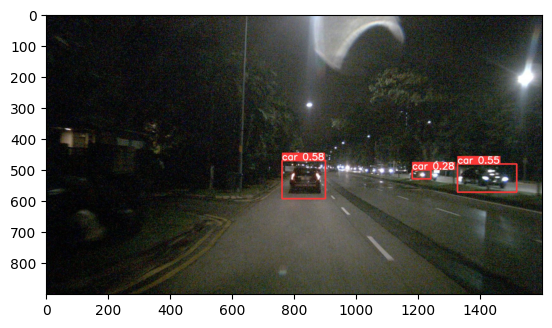

In [10]:
import os
from PIL import Image
import random
from matplotlib import pyplot as plt
import numpy as np

# Plot one of inferences
detections_dir = "/home/hwc/yolov5/runs/detect/yolo_nuscenes_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [12]:
# Calculate mAP
!python /home/hwc/yolov5/val.py --weights /home/hwc/yolov5/runs/train/yolo_nuscenes_det/weights/best.pt --data nuscenes_data.yaml --task test --name yolo_det

val: data=/home/hwc/yolov5/data/nuscenes_data.yaml, weights=['/home/hwc/yolov5/runs/train/yolo_nuscenes_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../../../yolov5/runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce GTX 950M, 2004MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/labe
test: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_data/images/test/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151608012404.jpg: ignoring corrupt image/label: negative label values [      -0.01]
test: WARNING ⚠️ /home/hwc/Desktop/Jupyter/2D_object_detection/organized_dat